In [248]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
import seaborn as sns
from datetime import datetime

In [79]:
# get SPF500 sector
stc_inst=pd.read_csv("/Users/yxair/Desktop/NW Bootbcamps/HW/Group Project/Stock Tickers and Industry.csv")
stc_nm=stc_inst["Security"]
# type(stc_nm)
stock_name=stc_nm.tolist()
stock_name
stc_inst.head()

,Security,SEC filings,Industry
0,MMM,3M Company,Industrials
1,ABT,Abbott Laboratories,Health Care
2,ABBV,AbbVie Inc.,Health Care
3,ABMD,ABIOMED Inc,Health Care
4,ACN,Accenture plc,Information Technology


In [247]:
fin_stc=stc_inst[stc_inst["Industry"]=="Financials"]
fin_lst=fin_stc["Security"].tolist()
fin_stc

,Security,SEC filings,Industry
10,AFL,AFLAC Inc,Financials
23,ALL,Allstate Corp,Financials
32,AXP,American Express Co,Financials
33,AIG,American International Group,Financials
36,AMP,Ameriprise Financial,Financials
...,...,...,...
465,UNM,Unum Group,Financials
478,WRB,W. R. Berkley Corporation,Financials
486,WFC,Wells Fargo,Financials
494,WLTW,Willis Towers Watson,Financials


# Using API to pull the stock price

In [ ]:
import pandas as pd
import requests

demo ='a74a4e302cd75c0ed624cacc4762e0e6'

companies = stock_name

listofdf = []



for item in companies:
    try:
        histprices = requests.get(f"https://fmpcloud.io/api/v3/historical-price-full/{item}?serietype=line&apikey={demo}")
        histprices = histprices.json()
        histprices = histprices['historical'][["date"]>="2020-02-28"]
        histpricesdf = pd.DataFrame.from_dict(histprices)
        histpricesdf = histpricesdf.rename({'close': item}, axis=1) 
        listofdf.append(histpricesdf)
    except Exception:
        pass

dfs = [df.set_index('date') for df in listofdf]
histpriceconcat = pd.concat(dfs,axis=1)
    
    

In [ ]:
# print(json.dumps(histprices, indent=4))

In [ ]:
# histpriceconcat.reset_index(inplace=True)
# histpriceconcat.rename(columns={"index":"date"},inplace=True)
# # histpriceconcat

In [ ]:
# his_smp=histpriceconcat[(histpriceconcat["date"]>="2020-02-28") &(histpriceconcat["date"]<="2020-04-9")]
# his_smp

In [20]:
stock_price=pd.read_csv("/Users/yxair/Desktop/NW Bootbcamps/HW/Group Project/Stock Prices.csv")
# stock_price.set_index("Date")

In [278]:
stock_price.head()

,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,...,XLNX.5,XOM.5,XRAY.5,XRX.5,XYL.5,YUM.5,ZBH.5,ZBRA.5,ZION.5,ZTS.5
0,1/31/20,82.350426,26.741179,131.378830,308.777191,79.829422,85.184814,186.289993,86.774590,204.288239,...,5043400,34282900,1625800,2335900,1553200,2117400,1407700,335900,1880800,2582300
1,2/3/20,81.941467,27.059999,132.276291,307.929199,81.090614,85.324196,185.949997,86.694923,206.866592,...,4640600,27397300,1324000,1839500,1259300,1671000,1905600,262400,2642600,2377000
2,2/4/20,83.307983,28.430000,131.189362,318.095062,83.120338,87.703720,190.899994,87.860023,211.575348,...,3275900,31922100,1081700,2661900,1380900,1595500,3068300,251100,2292300,1839800
3,2/5/20,84.714409,29.100000,136.633987,320.688934,85.356979,91.039032,190.729996,89.184441,211.266739,...,3477000,32099200,1084000,2328500,1803700,1814400,1364100,244200,2326100,1507600
4,2/6/20,84.604691,28.299999,133.991440,324.440002,85.898903,92.074471,196.009995,89.094818,213.198029,...,2777400,16055400,938400,2313700,5052400,3271600,1185700,407500,2144200,2206800


In [271]:
sub_stock=pd.DataFrame(stock_price,columns=stock_name)
sub_stock["date"]=stock_price["Date"]
sub_st=sub_stock.set_index("date")
sub_st.head()
stc_chg=sub_st.pct_change()

stc_chg.drop(stc_chg.index[0],inplace=True)
stc_chg.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2/3/20,-0.013047,-0.000918,0.015799,-0.001825,0.012621,-0.004617,0.019536,0.021702,0.006831,0.022659,...,0.019182,0.003758,0.020242,0.006747,0.020573,0.006051,0.014769,0.004124,0.013629,0.009761
2/4/20,0.004151,0.013439,0.025030,0.026620,0.022762,0.017179,0.024413,0.029779,-0.008217,0.014771,...,0.032042,-0.002160,0.007716,0.008583,0.038037,0.002819,0.021934,0.055619,0.012362,0.025458
2/5/20,0.032371,0.015074,0.026908,-0.000891,-0.001459,-0.006080,-0.003245,0.007887,0.041502,0.007278,...,-0.003165,0.000000,0.028712,0.028561,0.012715,0.000656,-0.000242,0.005932,0.028492,-0.007772
2/6/20,0.003450,-0.001005,0.006349,0.027683,0.009141,0.023959,0.005225,-0.010433,-0.019340,-0.008671,...,0.014439,0.000000,0.001595,-0.005780,-0.051250,-0.028470,0.017271,0.008307,-0.020829,0.007832
2/7/20,-0.017251,-0.017883,0.058614,-0.046426,-0.012047,0.021075,-0.003728,0.008313,-0.010717,-0.003887,...,-0.054251,-0.008514,-0.013535,-0.023940,0.012993,-0.016387,-0.019160,-0.016477,-0.016592,-0.000504


In [164]:
sub_st.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
1/31/20,157.236130,86.774590,79.829422,186.289993,204.288239,58.097900,351.140015,47.000000,131.378830,19.860001,...,125.110161,68.744751,35.117916,84.114929,81.408234,105.298073,239.020004,147.533401,45.155808,133.993210
2/3/20,155.184692,86.694923,81.090614,185.949997,206.866592,57.829662,358.000000,48.020000,132.276291,20.309999,...,127.510017,69.003075,35.828766,84.682465,83.083054,105.935226,242.550003,148.141892,45.771252,135.301086
2/4/20,155.828873,87.860023,83.120338,190.899994,211.575348,58.823128,366.739990,49.450001,131.189362,20.610001,...,131.595734,68.854042,36.105206,85.409309,86.243279,106.233887,247.869995,156.381439,46.337063,138.745514
2/5/20,160.873184,89.184441,85.356979,190.729996,211.266739,58.465481,365.549988,49.840000,136.633987,20.760000,...,131.179230,68.854042,37.141857,87.848724,87.339890,106.303574,247.809998,157.309128,47.657288,137.667252
2/6/20,161.428162,89.094818,85.898903,196.009995,213.198029,59.866268,367.459992,49.320000,133.991440,20.580000,...,133.073334,68.854042,37.201096,87.340927,82.863731,103.277138,252.089996,158.615875,46.664635,138.745514


In [294]:
stc_chg=stc_chg.T
stc_chg.reset_index(inplace=True)
stc_chg.rename(columns={"index":"Ticker"},inplace=True)
stc_chg.head(5)

date,Ticker,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/10/20,2/11/20,2/12/20,2/13/20,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/6/20,4/7/20,4/8/20,4/9/20,4/13/20
0,MMM,-0.013047,0.004151,0.032371,0.003450,-0.017251,0.000437,0.014362,0.008310,-0.015832,...,0.033774,-0.008930,-0.024687,0.035827,-0.029875,0.051648,0.027719,0.030360,-0.008121,-0.009338
1,ABT,-0.000918,0.013439,0.015074,-0.001005,-0.017883,0.004894,0.009853,-0.004261,-0.001239,...,0.064109,-0.005420,-0.029654,0.037482,0.000126,0.041284,-0.009670,0.036861,0.012831,-0.002208
2,ABBV,0.015799,0.025030,0.026908,0.006349,0.058614,0.026655,0.013193,0.018646,-0.024951,...,0.035365,0.012626,-0.036357,0.023291,-0.023426,0.032166,-0.004490,0.042048,0.015148,0.006897
3,ABMD,-0.001825,0.026620,-0.000891,0.027683,-0.046426,-0.068643,0.009995,-0.050506,-0.012819,...,0.025819,-0.025706,-0.004685,-0.008306,-0.013121,0.062659,0.016771,0.022843,0.024381,-0.023051
4,ACN,0.012621,0.022762,-0.001459,0.009141,-0.012047,0.004585,-0.001929,-0.000707,0.001934,...,0.042608,-0.038629,-0.052554,0.010279,-0.026365,0.091357,-0.011623,0.046368,0.036045,-0.030070


In [318]:
stcchg_ind=stc_chg.merge(stc_inst, left_on="Ticker",right_on="Security")
stcchg_avg=stcchg_ind.groupby("Industry").sum()
stcchg_avg=stcchg_avg.T
stcchg_avg

Industry,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
2/3/20,0.108727,0.253807,0.057422,-0.218409,0.578452,0.436327,0.357928,0.950787,0.504521,0.018113,0.151906
2/4/20,0.386312,1.027047,0.147749,0.300582,0.735834,1.033679,1.408823,1.581504,0.604570,0.368461,-0.255911
2/5/20,0.181998,0.999112,0.412891,1.047743,1.318015,1.207900,1.015335,0.598643,0.639786,0.050294,0.150803
2/6/20,0.254178,-0.400541,-0.064730,-0.303796,-0.228251,0.264574,-0.141057,0.214087,-0.058221,0.088003,-0.024544
2/7/20,-0.180884,-0.974371,0.102416,-0.218418,-0.236882,-0.624301,-0.468201,-0.886862,-0.474660,-0.027174,-0.075007
2/10/20,0.025626,0.216876,0.160542,-0.244917,0.198544,0.355931,0.335305,0.742441,-0.029277,0.294157,0.110628
2/11/20,0.242339,0.257078,-0.014457,0.361052,0.415944,0.595042,0.357177,0.490017,0.160349,0.109698,0.103012
2/12/20,0.399905,0.911782,-0.014471,0.407035,-0.001843,0.126972,0.690968,0.706534,0.139486,0.153518,0.023484
2/13/20,-0.078918,-0.370201,0.041061,-0.125237,0.092098,-0.141296,-0.389839,-0.019912,-0.312533,0.220339,0.254255
2/14/20,0.009581,0.008897,0.031052,-0.228539,0.090217,0.141856,-0.107802,-0.106985,-0.071742,0.377453,0.168376


# Boxplots for different sectors

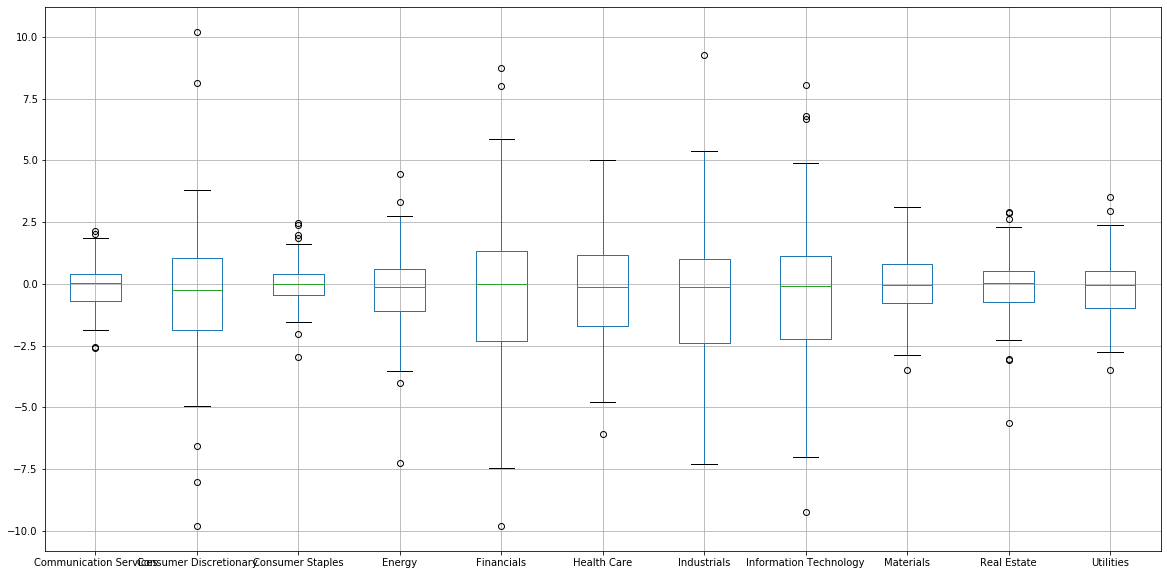

In [150]:
plt.figure(figsize=(20,10))
stcchg_avg.boxplot()

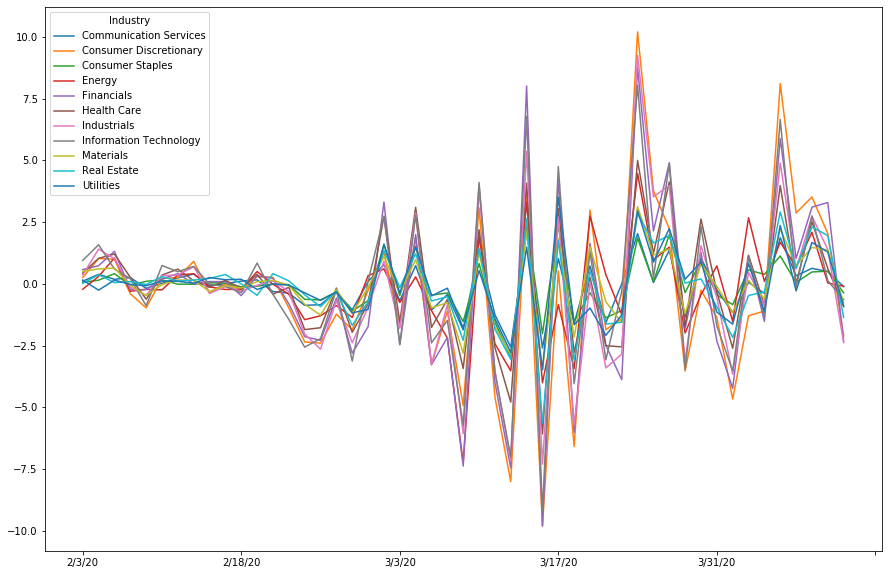

In [157]:
stcchg_avg.plot(figsize=(15,10))

# Financials Industry outliers

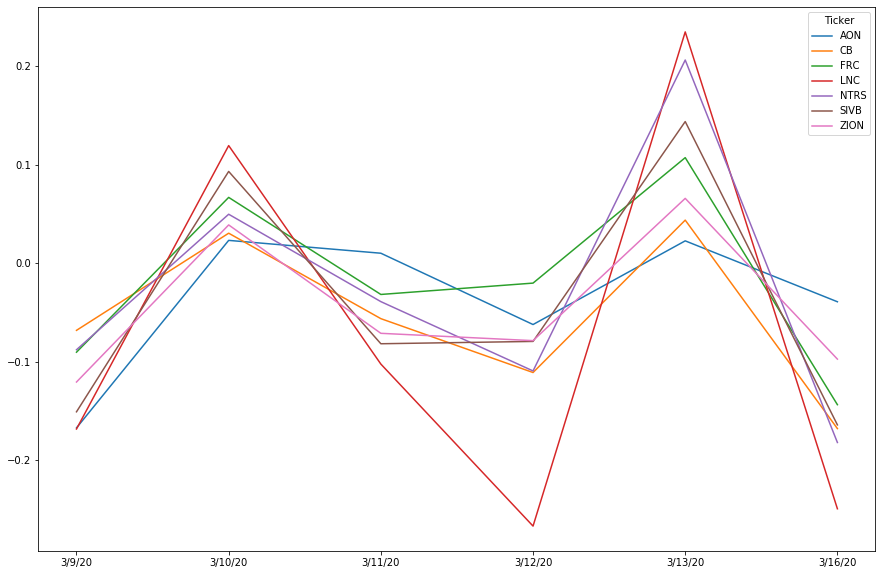

In [291]:
fin_stc=stcchg_ind[stcchg_ind["Industry"]=="Financials"]
fin_stc.set_index("Ticker",inplace=True)
# fin_stc_T=fin_stc.T
# fin_stc_T.drop(fin_stc_T.index[-3:],inplace=True)
# fin_stc_T.plot(figsize=(15,10))
# fin_stc["max"]=fin_stc.max(axis=1)
# fin_stc["min"]=fin_stc.min(axis=1)
# fin_stc["max"].max()
# #      # Lincoln National
# fin_chg_max.loc["0.3170028472340416"]
fin_wk=fin_stc.loc[["AON","CB","FRC","LNC","NTRS","SIVB","ZION"],["3/9/20","3/10/20","3/11/20","3/12/20","3/13/20","3/16/20"]]
# # fin_stc["Chg_sum"]=fin_stc.sum(axis=1)
# # print(fin_stc.max())
# # print(fin_stc.min())
fin_wk.T.plot(figsize=(15,10))

# # lnc_stc=fin_stc.loc["LNC"]
# # type(lnc_stc)
# # T.plot(figsize=(15,10))


In [122]:
# sub_stc=sub_st.T
# sub_log=np.log(sub_stc)
# sub_log
# sub_log.reset_index(inplace=True)
# sub_log.rename(columns={"index":"Ticker"},inplace=True)


In [141]:
# stclog_ind=sub_log.merge(stc_inst, left_on="Ticker",right_on="Security")
# stclog_avg=stclog_ind.groupby("Industry").mean()
# stclog_avg=stclog_avg.T
# # stclog_avg.head()
# sns.pairplot(stclog_avg)
# # plt.show()

# CDC data

In [279]:
cdc_data=pd.read_csv("/Users/yxair/Desktop/NW Bootbcamps/HW/Group Project/us-counties.csv")

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [280]:
cdc_smp1=cdc_data[cdc_data["date"]>="2020-02-03"]  # &(cdc_data["date"]<="2020-04-9")
cdc_smp2=cdc_smp1[["date","cases","deaths"]]
cdc_smp3=cdc_smp2.groupby("date").sum()
cdc_smp3.reset_index(inplace=True)
cdc_smp3
cdc_smp3["date"])

pandas.core.series.Series

In [289]:
sub_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Columns: 506 entries, MMM to date
dtypes: float64(505), object(1)
memory usage: 197.8+ KB


In [297]:
cdc_smp3.sample()

,date,cases,deaths
5,2020-02-08,12,0


In [300]:
cdc_smp3.info()
cdc_smp3["date"] = pd.to_datetime(cdc_smp3["date"]).dt.strftime('%m/%d/%Y')
cdc_smp3.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    71 non-null     object
 1   cases   71 non-null     int64 
 2   deaths  71 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.8+ KB


,date,cases,deaths
23,02/26/2020,60,0


In [307]:
sub_stock["date"] = pd.to_datetime(sub_stock["date"]).dt.strftime('%m/%d/%Y')
merge_data=sub_stock.merge(cdc_smp3,left_on="date", right_on="date",how="left")
merge_data=merge_data.fillna(0)
merge_data.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS,date,cases,deaths
0,157.236130,86.774590,79.829422,186.289993,204.288239,58.097900,351.140015,47.000000,131.378830,19.860001,...,84.114929,81.408234,105.298073,239.020004,147.533401,45.155808,133.993210,01/31/2020,0.0,0.0
1,155.184692,86.694923,81.090614,185.949997,206.866592,57.829662,358.000000,48.020000,132.276291,20.309999,...,84.682465,83.083054,105.935226,242.550003,148.141892,45.771252,135.301086,02/03/2020,11.0,0.0
2,155.828873,87.860023,83.120338,190.899994,211.575348,58.823128,366.739990,49.450001,131.189362,20.610001,...,85.409309,86.243279,106.233887,247.869995,156.381439,46.337063,138.745514,02/04/2020,11.0,0.0
3,160.873184,89.184441,85.356979,190.729996,211.266739,58.465481,365.549988,49.840000,136.633987,20.760000,...,87.848724,87.339890,106.303574,247.809998,157.309128,47.657288,137.667252,02/05/2020,12.0,0.0
4,161.428162,89.094818,85.898903,196.009995,213.198029,59.866268,367.459992,49.320000,133.991440,20.580000,...,87.340927,82.863731,103.277138,252.089996,158.615875,46.664635,138.745514,02/06/2020,12.0,0.0


In [ ]:
# merge_data["avg_stc"]= (merge_data["GOOG"] + merge_data["F"] + merge_data["MSFT"])/3
# merge_data.head(5)

The correlation between both factors is -0.46


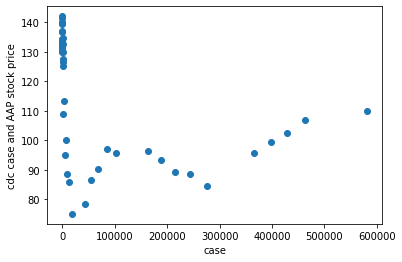

In [308]:
aap_stc = merge_data.iloc[:,8]
cases = merge_data.iloc[:,-2]
correlation = st.pearsonr(cases,aap_stc)
plt.scatter(cases,aap_stc)
plt.xlabel('case')
plt.ylabel("cdc case and AAP stock price")
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

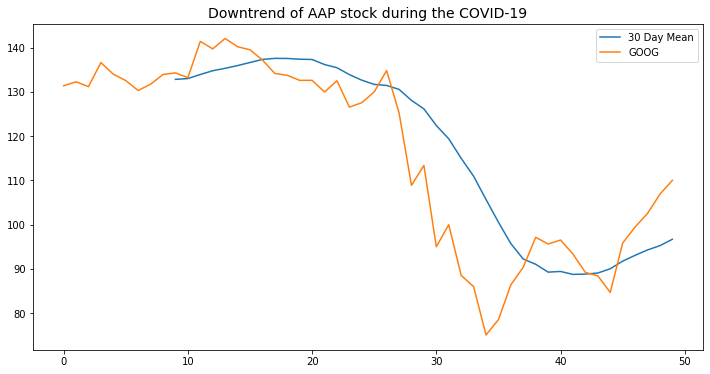

In [310]:
plt.figure(figsize=(12,6))
plt.title('Downtrend of AAP stock during the COVID-19', size=14)
merge_data["AAP"].rolling(window=10).mean().plot(label='30 Day Mean')
merge_data["AAP"].plot(label='GOOG')
plt.legend()
plt.show()
# .loc['2020-02-28':'2020-04-09']

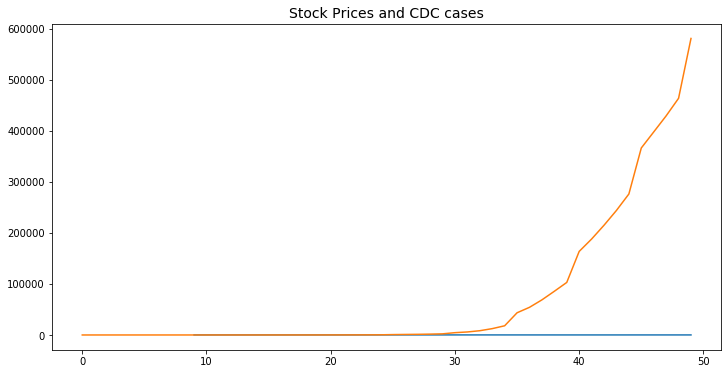

In [312]:
# plt.figure(figsize=(12,6))
# plt.title('Stock Prices and CDC cases', size=14)
# merge_data["AAP"].rolling(window=10).mean().plot(label='AAP MEAN')
# merge_data["cases"].plot(label='cases')
# # plt.legend()
# # plt.show()

AttributeError: 'Line2D' object has no property 'secondary_y'

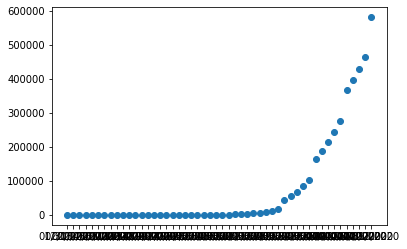

In [313]:
fig2 = plt.figure()

plt.plot_date(merge_data["date"], merge_data["cases"])
plt.plot_date(merge_data["date"], merge_data["AAP"], secondary_y=True)

fig2.autofmt_xdate()

plt.show()

<Figure size 1440x720 with 0 Axes>

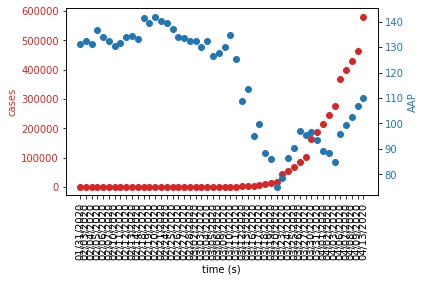

In [316]:
plt.figure(figsize=(20,10))
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('cases', color=color)
ax1.plot_date(merge_data["date"], merge_data["cases"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

plt.xticks(rotation=90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('AAP', color=color)  # we already handled the x-label with ax1
ax2.plot_date(merge_data["date"], merge_data["AAP"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()